In [19]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"autumn4232","key":"b371dbfd4fdf38f620ff609eb71fb16e"}'}

In [20]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json
# 내가 참가한 대회 리스트 확인
!kaggle competitions list

ref                                                       deadline             category            reward  teamCount  userHasEntered  
--------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
mpetitions/contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         39           False  
mpetitions/gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        138           False  
mpetitions/store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        891           False  
mpetitions/tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        162           False  
mpetitions/digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2053           False  
mpetitions/titanic                                     

In [21]:
! kaggle competitions kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

usage: kaggle competitions [-h]
                           {list,files,download,submit,submissions,leaderboard}
                           ...
kaggle competitions: error: argument command: invalid choice: 'kaggle' (choose from 'list', 'files', 'download', 'submit', 'submissions', 'leaderboard')


In [22]:
!ls

kaggle.json  sample_data


In [23]:
!unzip train.zip

unzip:  cannot find or open train.zip, train.zip.zip or train.zip.ZIP.


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip /content/chest-xray-pneumonia.zip

In [56]:
import numpy as np
import cv2

In [58]:
from IPython.display import Image

In [79]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from IPython.display import clear_output

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [47]:
import os, re
import random, math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')
# 필요한 변수들을 생성한다.

# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE
# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [180, 180]

# 데이터 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')
TRAIN_PATH = ROOT_PATH + '/chest_xray/data/train/*/*' # *은 모든 디렉토리와 파일을 의미합니다.
VAL_PATH = ROOT_PATH + '/chest_xray/data/val/*/*'
TEST_PATH = ROOT_PATH + '/chest_xray/data/test/*/*'

# 프로젝트를 진행할 때 아래 두 변수를 변경해보세요
BATCH_SIZE = 16
EPOCHS = 25

print(ROOT_PATH)

/root/aiffel


In [27]:
import re    # 정규표현식 관련된 작업에 필요한 패키지
import os    # I/O 관련된 작업에 필요한 패키지 
import pandas as pd     # 데이터 전처리 관련된 작업에 필요한 패키지
import numpy as np      # 데이터 array 작업에 필요한 패키지
import tensorflow as tf  # 딥러닝 관련된 작업에 필요한 패키지
import matplotlib.pyplot as plt    # 데이터 시각화에 관련된 작업에 필요한 패키지
from sklearn.model_selection import train_test_split  # 데이터 전처리에 필요한 패키지

In [30]:
print(len(os.listdir('/content/chest_xray/train/NORMAL')))
print(len(os.listdir('/content/chest_xray/chest_xray/train/NORMAL')))
print(len(os.listdir('/content/chest_xray/__MACOSX/chest_xray/train/NORMAL')))

1341
1342
1342


In [31]:
is_duplicated = {}
for i in os.listdir('/content/chest_xray/chest_xray/train/NORMAL'):

    if i in os.listdir('/content/chest_xray/train/NORMAL'):
        is_duplicated[i] = True
    else:
        is_duplicated[i] = False

In [32]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
IMAGE_SIZE = [720,720]
ROOT_PATH = '/content/chest_xray'
TRAIN_PATH = ROOT_PATH + '/train/*/*.jpeg' #jpeg 형태의 데이터를 모두 지정합니다
VAL_PATH = ROOT_PATH + '/val/*/*.jpeg'    #폴더내에 jpg형태의 파일이 섞여있었습니다
TEST_PATH = ROOT_PATH + '/test/*/*.jpeg'

In [33]:
train_files = tf.io.gfile.glob(TRAIN_PATH)
test_files = tf.io.gfile.glob(TEST_PATH)
val_files = tf.io.gfile.glob(VAL_PATH)
print(len(train_files),len(test_files),len(val_files))


5216 624 16


In [34]:
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

In [35]:
filenames[:10]


['/content/chest_xray/train/NORMAL/NORMAL2-IM-0819-0001.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0673-0001.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0471-0001.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0345-0001.jpeg',
 '/content/chest_xray/train/NORMAL/NORMAL2-IM-1156-0001.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0696-0001.jpeg',
 '/content/chest_xray/train/NORMAL/NORMAL2-IM-1132-0001.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0340-0001.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0129-0001.jpeg',
 '/content/chest_xray/train/NORMAL/IM-0633-0001.jpeg']

In [36]:
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")

COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")

Normal images count in training set: 0
Pneumonia images count in training set: 0


In [37]:
train_size = int((len(filenames)*0.8))
random.seed(8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]
print(len(train_filenames),len(val_filenames))

4185 1047


In [38]:
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

#file count
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(TRAIN_IMG_COUNT)
VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(VAL_IMG_COUNT)

4185
1047


In [39]:
def get_label(file_path):
    parts = tf.strings.split(file_path,os.path.sep) # path를 '/' 기준 split
    return parts[-2] == "PNEUMONIA"
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) #이미지 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, IMAGE_SIZE) # 이미지 사이즈를 IMAGE_SIZE만큼 수정
    return img
def process_path(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path) # 이미지 읽기
    #with open(file_path, 'rb') as f:
    #    img = f.read() # get label
    img = decode_img(img) # image preprocess
    return img, label
    
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [70]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  False


In [83]:
def prepare_for_training(ds, shuffle_buffer_size=1000):
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

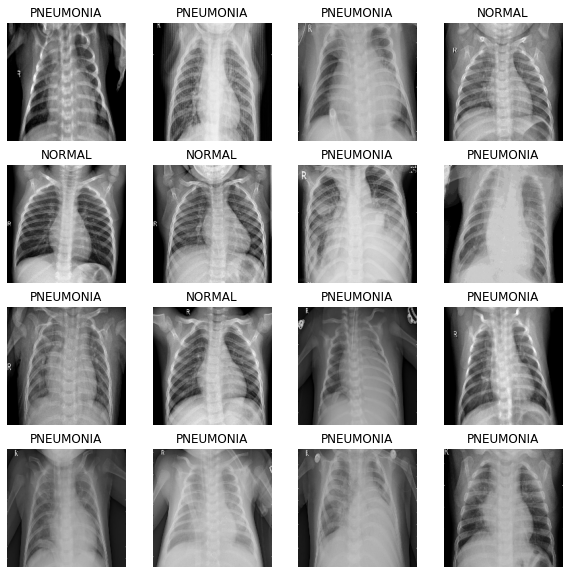

In [84]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,math.ceil(BATCH_SIZE/4),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())